# CL61 Module - Test on processing

This jupyternotebook takes a focus on the testing of the processes of the CL61 module.

This encompasses the different elements:
- noise processing
- clustering
- classification

## 0) Import module and initial plot

In [2]:
from context import CL61_module as mCL61

In [3]:
#file_name = 'cl61_20230204.nc' # februar 04, the main data which was tested
file_name = 'cl61_20230628.nc' # 27 June, Greenfjord 
CL61_data_module = mCL61.CL61Processor(folder_path='../Data', specific_filename=file_name)

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


c:\Users\gezas\.conda\envs\atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

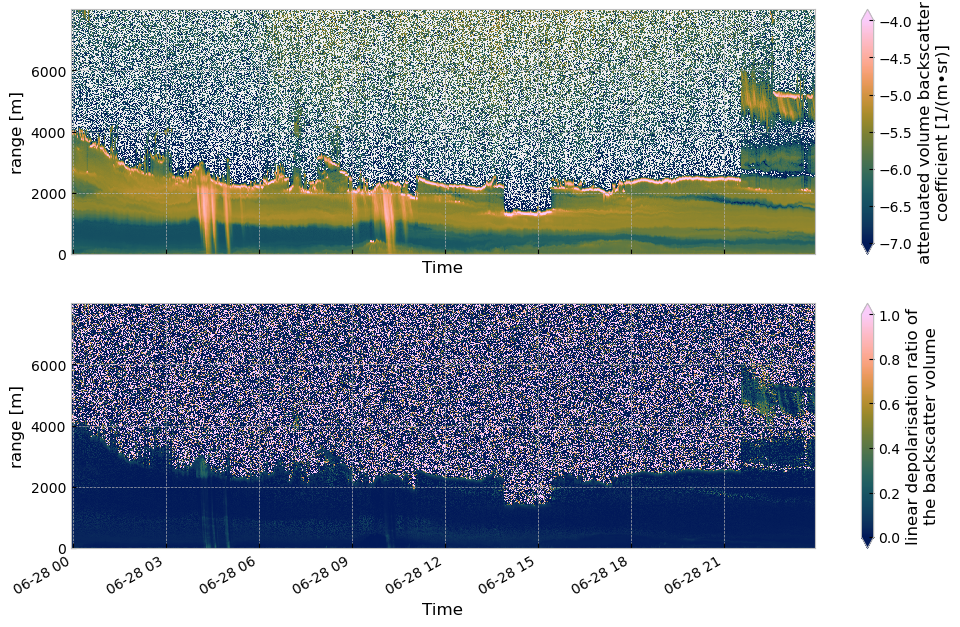

In [4]:
CL61_data_module.plot.show_timeserie(range_limits=[0,8000])

## 1) Noise processing

In the noise processing, the final approach is implemented in the process.mask_noise() method but other methods are also tested.

### i) Main noise processing

The final method is basically:
- Checking if a value inside a rolling windows is noise (outside of expected range)
- Keeping only full valid windows

In [5]:
CL61_data_module.process.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


### ii) Process noise with filters

In [10]:
CL61_data_module.process.rolling_window_stats(stat = 'mean', variable_name='beta_att', time_window_size=10, range_window_size=10)
CL61_data_module.process.rolling_window_stats(stat = 'mean', variable_name='linear_depol_ratio', time_window_size=10, range_window_size=10)
None
# 10x10 takes only 10s
# 30x15 takes around 1min

Saved the result as variable : beta_att_roll_mean
Saved the result as variable : linear_depol_ratio_roll_mean


In [11]:
CL61_data_module.process.rolling_window_stats(stat = 'median', variable_name='beta_att', time_window_size=10, range_window_size=10)
CL61_data_module.process.rolling_window_stats(stat = 'median', variable_name='linear_depol_ratio', time_window_size=10, range_window_size=10)
# 7x7 takes around 2 minutes
# 10x10 takes around 7 minutes already

Saved the result as variable : beta_att_roll_median
Saved the result as variable : linear_depol_ratio_roll_median


<xarray.DataArray 'linear_depol_ratio' (time: 1440, range: 3276)>
array([[ 0.07095087,  0.05996215,  0.05226676, ...,  0.5163406 ,
         0.33073348,  0.28559816],
       [ 0.05383557,  0.05002789,  0.04690951, ...,  0.4171145 ,
         0.29105437,  0.28559816],
       [ 0.07095087,  0.05996215,  0.05226676, ...,  0.24591905,
         0.24046284,  0.23317942],
       ...,
       [ 0.056733  ,  0.04849323,  0.04382797, ..., -0.2192057 ,
        -0.1477624 , -0.05430092],
       [ 0.06446961,  0.05609675,  0.04749323, ..., -0.2192057 ,
        -0.16022737, -0.1477624 ],
       [ 0.056733  ,  0.05260091,  0.04577935, ..., -0.2644811 ,
        -0.16690806, -0.16690806]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2023-02-03T23:57:10.712999936 ... 2023-0...
  * range      (range) float64 0.0 4.8 9.6 ... 1.571e+04 1.572e+04 1.572e+04
    longitude  float64 7.361
    latitude   float64 46.22
Attributes:
    long_name:                  linear depolarisation ratio of the backscatte...
    averaging time in seconds:  60

c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

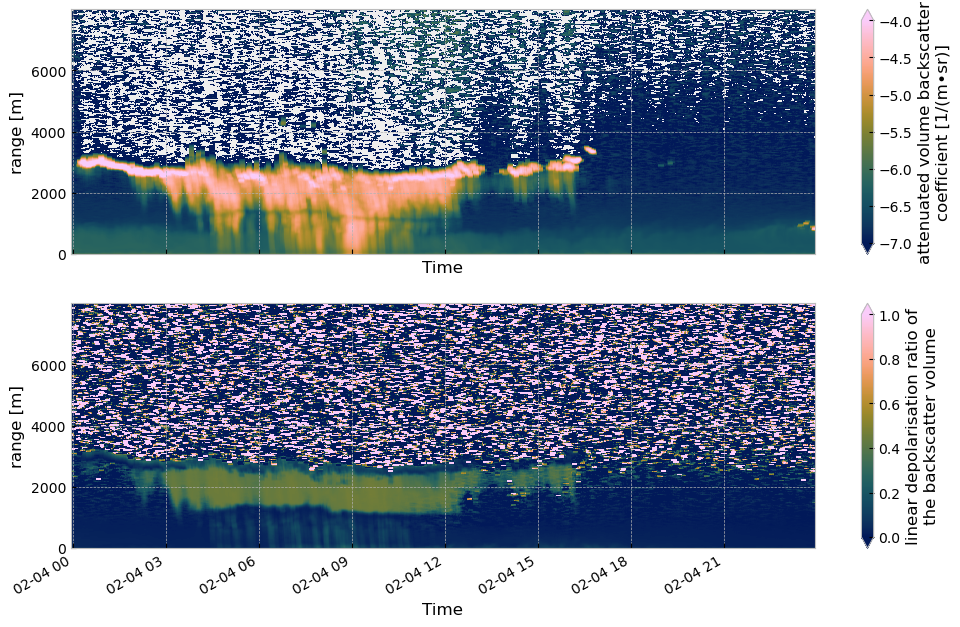

In [24]:
# save_fig='feb04_rol_mean_15x10.jpg'
CL61_data_module.plot.show_timeserie(variable_names=['beta_att_roll_mean', 'linear_depol_ratio_roll_mean'],
                           range_limits=[0,8000], save_fig = 'feb04_rollmean_10x10_8000m.jpg')

array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

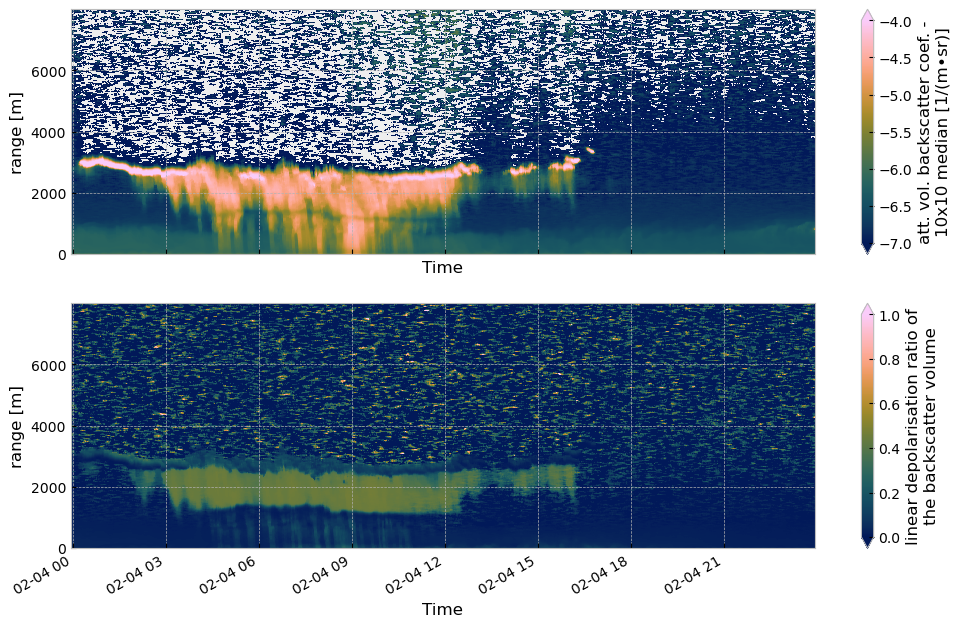

In [25]:
CL61_data_module.plot.show_timeserie(variable_names=['beta_att_roll_median', 'linear_depol_ratio_roll_median'],
                          range_limits=[0,8000], save_fig='feb04_rol_median_10x10_8000m.jpg')

### iii) Compare results

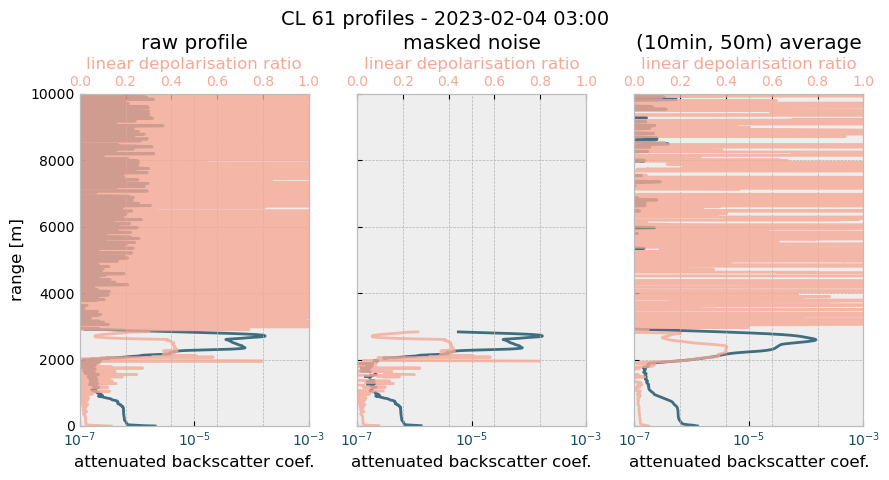

In [116]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,3, figsize = (9,5), sharey=True)
range_of_interest = [0,10000]
axs[0], axs02 = CL61_data_module.plot.vertical_profile(time_period='2023-02-04 03:00', var_names=['beta_att', 'linear_depol_ratio'],
                                                    var_xlims=[[1e-7, 1e-3], [0,1]],
                                                    xlabel1='attenuated backscatter coef.',
                                                    xlabel2= 'linear depolarisation ratio',
                                                    fig = fig, ax = axs[0],
                                                    range_limits = range_of_interest,
                                                    title = 'raw profile')

CL61_data_module.plot.vertical_profile(time_period='2023-02-04 03:00', var_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                                 var_xlims=[[1e-7, 1e-3], [0,1]],
                                 xlabel1='attenuated backscatter coef.',
                                 xlabel2= 'linear depolarisation ratio',
                                 fig = fig, ax = axs[1],
                                 range_limits = range_of_interest,
                                 title = 'masked noise')
axs[1].set_ylabel(None)
CL61_data_module.plot.vertical_profile(time_period='2023-02-04 03:00', var_names=['beta_att_roll_mean', 'linear_depol_ratio_roll_mean'],
                                 var_xlims=[[1e-7, 1e-3], [0,1]],
                                 xlabel1='attenuated backscatter coef.',
                                 xlabel2= 'linear depolarisation ratio',
                                 fig = fig, ax = axs[2],
                                 range_limits = range_of_interest,
                                 title = '(10min, 50m) average')
axs[2].set_ylabel(None)

plt.suptitle('CL 61 profiles - 2023-02-04 03:00', y = 0.95, fontsize = 14)
plt.tight_layout()
plt.savefig("../Outputs/feb04_03h_compare_profiles_10000.jpg", dpi=300)
plt.show()

### iv) We could try mean or median filtering on the direct measures

In [117]:
# 15x10 = 30minutes x 50m
window = (15,10)
CL61_data_module.process.rolling_window_stats(stat = 'mean', variable_name='beta_att', time_window_size=window[0], range_window_size=window[1])
CL61_data_module.process.rolling_window_stats(stat = 'mean', variable_name='linear_depol_ratio', time_window_size=window[0], range_window_size=window[1])
## VS
CL61_data_module.process.rolling_window_stats(stat = 'mean', variable_name='x_pol', time_window_size=window[0], range_window_size=window[1])
CL61_data_module.process.rolling_window_stats(stat = 'mean', variable_name='p_pol', time_window_size=window[0], range_window_size=window[1])

Saved the result as variable : beta_att_roll_mean
Saved the result as variable : linear_depol_ratio_roll_mean
Saved the result as variable : x_pol_roll_mean
Saved the result as variable : p_pol_roll_mean


<xarray.DataArray 'p_pol' (time: 1440, range: 3276)>
array([[ 1.17553179e-06,  1.13308772e-06,  1.09207599e-06, ...,
        -1.18419685e-07, -1.18243165e-07, -5.88261742e-08],
       [ 1.17485581e-06,  1.13182011e-06,  1.09037683e-06, ...,
         1.86412379e-08, -6.07818196e-09,  3.51143612e-08],
       [ 1.15984699e-06,  1.11885777e-06,  1.07904384e-06, ...,
        -1.32649504e-07, -1.63267345e-07, -1.24142773e-07],
       ...,
       [ 8.24857352e-07,  7.87248666e-07,  7.52633866e-07, ...,
        -1.74222691e-06, -1.90336289e-06, -2.06143045e-06],
       [ 8.36925437e-07,  7.97484972e-07,  7.61419983e-07, ...,
        -1.60530567e-06, -1.78522237e-06, -1.97040140e-06],
       [ 8.04806746e-07,  7.69678024e-07,  7.37057633e-07, ...,
        -1.68162285e-06, -1.83782015e-06, -1.99743999e-06]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2023-02-03T23:57:10.712999936 ... 2023-0...
  * range      (range) float64 0.0 4.8 9.6 ... 1.571e+04 1.572e+04 1.572e+04
    longitude  float64 7.361
    latitude   float64 46.22
Attributes:
    units:                      1/(m∙sr)
    long_name:                  parallel-polarized component of the backscatt...
    averaging time in seconds:  60

In [126]:
CL61_data_module.dataset['beta_att_new'] = CL61_data_module.dataset['p_pol_roll_mean'] + CL61_data_module.dataset['x_pol_roll_mean']
CL61_data_module.dataset['beta_att_new'].attrs['long_name'] = 'sum of mean polarisations'
CL61_data_module.dataset['linear_depol_ratio_new'] = CL61_data_module.dataset['x_pol_roll_mean'] / CL61_data_module.dataset['p_pol_roll_mean']
CL61_data_module.dataset['linear_depol_ratio_new'].attrs['long_name'] = 'mean polarisations ratio'

array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

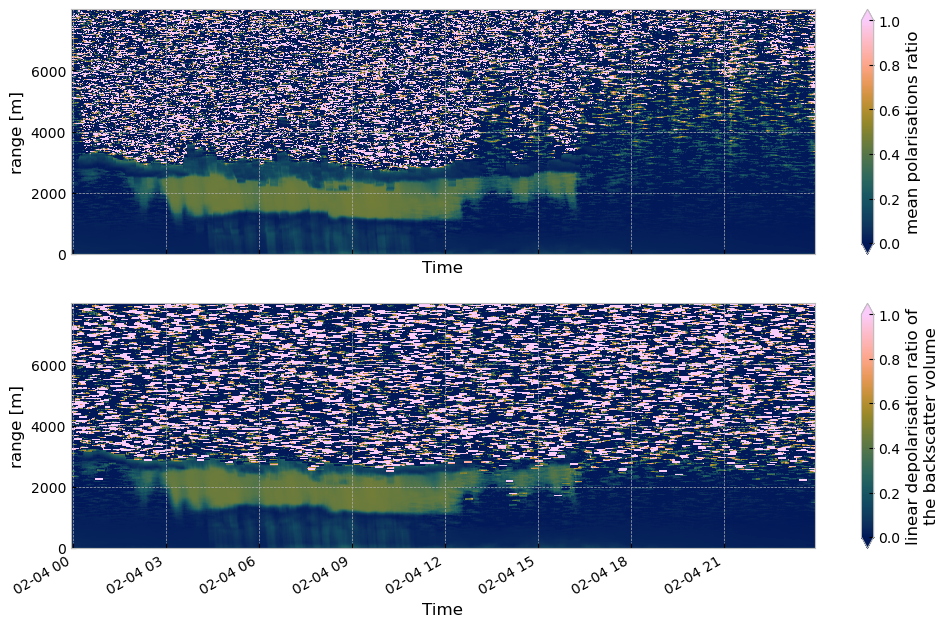

In [127]:
CL61_data_module.plot.show_timeserie(variable_names=['linear_depol_ratio_new', 'linear_depol_ratio_roll_mean'], scales= ['lin', 'lin'], value_ranges=[[0, 1],[0, 1]],
                           range_limits=[0,8000], save_fig='feb04_lin_depol_mean_15x10_x_p_pol.jpg')

In [ ]:
CL61_data_module.plot.compare_profiles('2023-02-04 03:00',
                                 comparison='variable', var_names_1=['beta_att_roll_mean', 'linear_depol_ratio_roll_mean'],
                                 var_names_2=['beta_att_new','linear_depol_ratio_new'],
                                 save_fig='feb04_comp_rol_mean_15x10_03h.jpg')

In [ ]:
CL61_data_module.plot.compare_profiles("2023-02-04 03:00", var_names_1=['beta_att_roll_mean', 'linear_depol_ratio_roll_mean'],
                                 var_names_2= ['beta_att_new', 'linear_depol_ratio_new'],
                                 save_fig='feb04_compare_direct_indirect_mean_15x10.jpg')

## 2) Classification

(4717440, 3)
Scaler means: [-5.78283455e+00  1.75196911e-01  1.31780207e+03]  
 and scales: [8.24022280e-01 1.74953662e-01 8.67763000e+02]


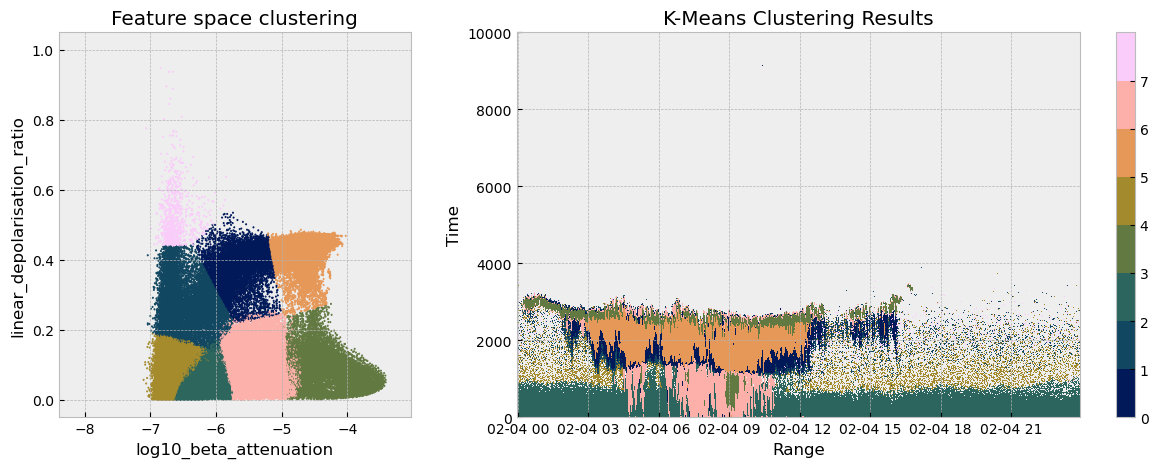

In [6]:
CL61_data_module.process.clustering.perform_K_means(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                              transforms=['log', 'lin', 'lin'],
                                                weights=[1,1, 0.3],
                                                cluster_N=8,
                                                plot_result=True,
                                                kmean_method  = 'random')

(4717440, 3)
Scaler means: [-5.78283455e+00  1.75196911e-01  1.31780207e+03]  
 and scales: [8.24022280e-01 1.74953662e-01 8.67763000e+02]


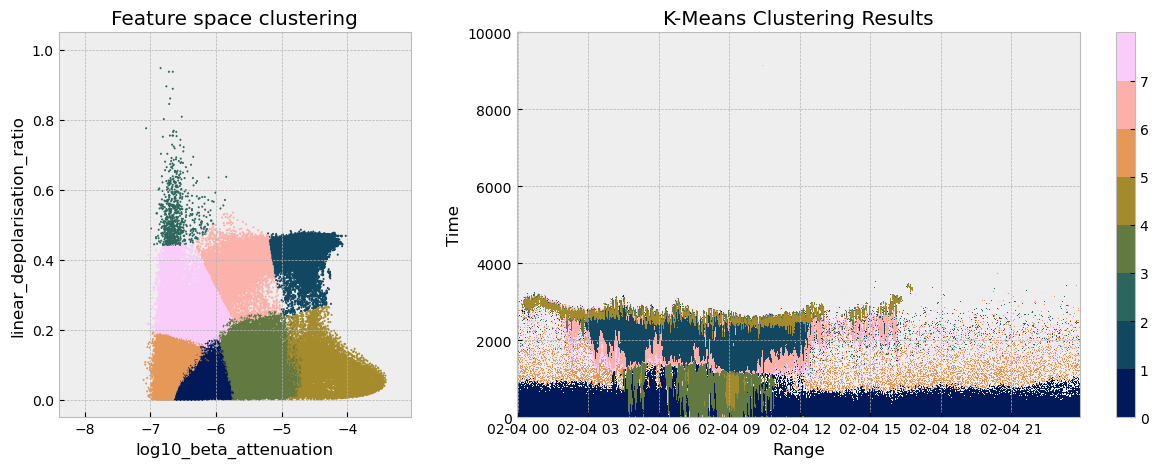

In [5]:
CL61_data_module.process.clustering.perform_K_means(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                              transforms=['log', 'lin', 'lin'],
                                                weights=[1,1, 0.3],
                                                cluster_N=8,
                                                plot_result=True,
                                                kmean_method  = 'k-means++')

In [7]:
CL61_data_module.process.clustering.perform_dbscan(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                                transforms=['log', 'lin', 'lin'],
                                                weights=[1,1, 0.2],
                                                dbscan_eps=0.1,
                                                dbscan_min_samples=500, plot_result=True)

# eps = 0.01, min = 10  >>       20s
# eps = 0.02, min = 10  >>       30s
# eps = 0.02, min = 100 >> 1 min 30s
# eps = 0.03, min = 15  >> 1 min 10s
# eps = 0.05, min = 50  >> 2 min 
# eps = 0.05, min = 30  >> 5 min
# eps = 0.05, min = 200 >> 2 min
# eps = 0.1, min = 1000 >> 
# eps = 0.1, min = 500  >> 

(4717440, 3)
Scaler means: [-5.78283455e+00  1.75196911e-01  1.31780207e+03]  
 and scales: [8.24022280e-01 1.74953662e-01 8.67763000e+02]


MemoryError: 

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

def optimized_clustering(data, weights = [1,1,0.2], 
                          start=5, stop=20, step=5,  fraction_for_silhouette=0.05, refined_step=1,
                          downsampling_fraction = None,
                          min_cluster = 5, random_state_seed = 8):
    
    if downsampling_fraction != None:
        # Subset the data for speed
        subset_data = data.sample(frac=downsampling_fraction, random_state=random_state_seed)
    else:
        subset_data = data
    # Get size for silhouette sampling 
    silhouette_sampling_size = int(fraction_for_silhouette * len(data))
    print(f'size of data for silhouette sampling {silhouette_sampling_size}')
        
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(subset_data)
    
    if weights is not None:
        # Weighting as 1/weight to increase the distance
        for i in range(len(weights)):
            scaled_data[:, i] *= weights[i]
    
    # Save best kmean clustering result
    best_cluster_dic = {'score':0,
                    'cluster_N':None,
                    'array':None}
    
    # Perform silhouette analysis for a range of cluster numbers
    silhouette_scores = []
    for n_clusters in tqdm(range(start, stop + 1, step)):
        # Run k-mean
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state_seed, init='k-means++', n_init='auto')
        cluster_labels = kmeans.fit_predict(scaled_data)
        # Compute metric
        silhouette_avg = silhouette_score(scaled_data, cluster_labels, sample_size=silhouette_sampling_size)
        silhouette_scores.append((n_clusters, silhouette_avg))
        # Check if improvement for best clustering
        if silhouette_avg > best_cluster_dic['score']:
            best_cluster_dic['array'] = cluster_labels
            best_cluster_dic['cluster_N'] = n_clusters
            best_cluster_dic['score'] = silhouette_avg
            

    # Find the number of clusters with the highest silhouette score
    best_cluster = max(silhouette_scores, key=lambda x: x[1])
    top_earlier = best_cluster[0]

    # Refine the cluster number range
    refined_start = max(min_cluster, top_earlier - step)
    refined_stop = top_earlier + step

    # Perform silhouette analysis for the refined range
    refined_scores = []
    for n_clusters in tqdm(range(refined_start, refined_stop, refined_step)):
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state_seed, init='k-means++', n_init='auto')
        cluster_labels = kmeans.fit_predict(scaled_data)
        silhouette_avg = silhouette_score(scaled_data, cluster_labels, sample_size=silhouette_sampling_size)
        refined_scores.append((n_clusters, silhouette_avg))
        if silhouette_avg > best_cluster_dic['score']:
            best_cluster_dic['array'] = cluster_labels
            best_cluster_dic['cluster_N'] = n_clusters
            best_cluster_dic['score'] = silhouette_avg
            

    # Find the final number of clusters with the highest silhouette score
    best_final_cluster = max(refined_scores, key=lambda x: x[1])
    final_clusters = best_final_cluster[0]
    print(f"The optimal number of clusters is: {final_clusters}")

    
    # Plot the silhouette scores
    plt.figure(figsize=(10, 3))
    plt.plot(*zip(*silhouette_scores), marker='o', label = 'Initial Range')
    plt.plot(*zip(*refined_scores), marker='o', label = 'Refined Range')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

    all_score_dict = {'Initial_range':silhouette_scores, 'Refined_range':refined_scores}

    return all_score_dict, best_cluster_dic


In [7]:
# Usage example
coarsed_ds = CL61_data_module.dataset.coarsen(time=5, range=10, boundary='pad').mean().copy()
coarsed = mCL61.CL61Processor(folder_path=None, dataset=coarsed_ds)

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.yml 


(92824, 3)
size of data for silhouette sampling 10110


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:12<00:00,  2.40s/it]


The optimal number of clusters is: 5


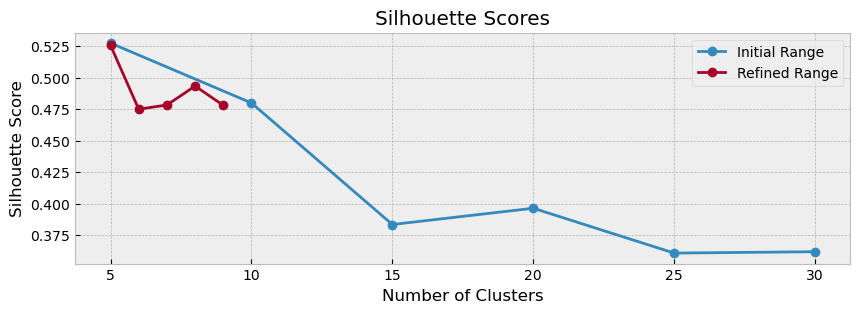

In [10]:
fmatrix, nan_rows, fmatrix_clean = coarsed.process.clustering.dataset_to_sample_feature()
feature_data = pd.DataFrame(fmatrix_clean, columns=['beta_att', 'lin_depol_ratio', 'range'])
best_cluster = optimized_clustering(feature_data, start=5, stop=30, step=5, min_cluster=5, random_state_seed=10, fraction_for_silhouette=0.6)

(4635540, 3)


100%|██████████| 11/11 [00:05<00:00,  1.89it/s]


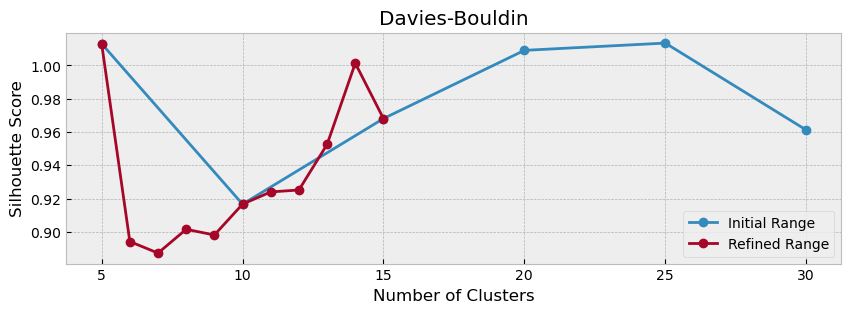

The optimal number of clusters is: 7


In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

def find_optimal_clusters(data, start=5, stop=30, step=5, subsample_frac=0.5):
    # Randomly subsample the data for speed
    subset_data = data.sample(frac=subsample_frac, random_state=42)
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(subset_data)
    
    # Perform Davies-Bouldin index analysis for a range of cluster numbers
    db_scores = []
    for n_clusters in tqdm(range(start, stop + 1, step)):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', n_init='auto')
        cluster_labels = kmeans.fit_predict(scaled_data)
        db_index = davies_bouldin_score(scaled_data, cluster_labels)
        db_scores.append((n_clusters, db_index))

    # Find the number of clusters with the lowest Davies-Bouldin index
    best_cluster = min(db_scores, key=lambda x: x[1])
    top_earlier = best_cluster[0]

    # Refine the cluster number range
    refined_start = max(2, top_earlier - 5)
    refined_stop = top_earlier + 5

    # Perform Davies-Bouldin index analysis for the refined range
    refined_scores = []
    for n_clusters in tqdm(range(refined_start, refined_stop + 1)):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', n_init='auto')
        cluster_labels = kmeans.fit_predict(scaled_data)
        db_index = davies_bouldin_score(scaled_data, cluster_labels)
        refined_scores.append((n_clusters, db_index))

    # Find the final number of clusters with the lowest Davies-Bouldin index
    best_final_cluster = min(refined_scores, key=lambda x: x[1])
    final_clusters = best_final_cluster[0]

    # Plot the Davies-Bouldin index scores
    plt.figure(figsize=(10, 3))
    plt.plot(*zip(*db_scores), marker='o', label = 'Initial Range')
    plt.plot(*zip(*refined_scores), marker='o', label = 'Refined Range')
    plt.title('Davies-Bouldin')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

    return final_clusters

# Usage example
# Assuming your data is in a DataFrame called 'your_data'
# Adjust the parameters as needed
fmatrix, nan_rows, fmatrix_clean = CL61_data_module.process.clustering.dataset_to_sample_feature()
feature_data = pd.DataFrame(fmatrix_clean, columns=['beta_att', 'lin_depol_ratio', 'range'])
best_clusters = find_optimal_clusters(feature_data, start=5, stop=30, step=5, subsample_frac=0.5)
print(f"The optimal number of clusters is: {best_clusters}")


(4635540, 3)
Scaler means: [-5.64152437e+00  4.20340697e-02  1.36373752e+03]  
 and scales: [5.01994683e-01 7.62564553e-02 1.09187374e+03]


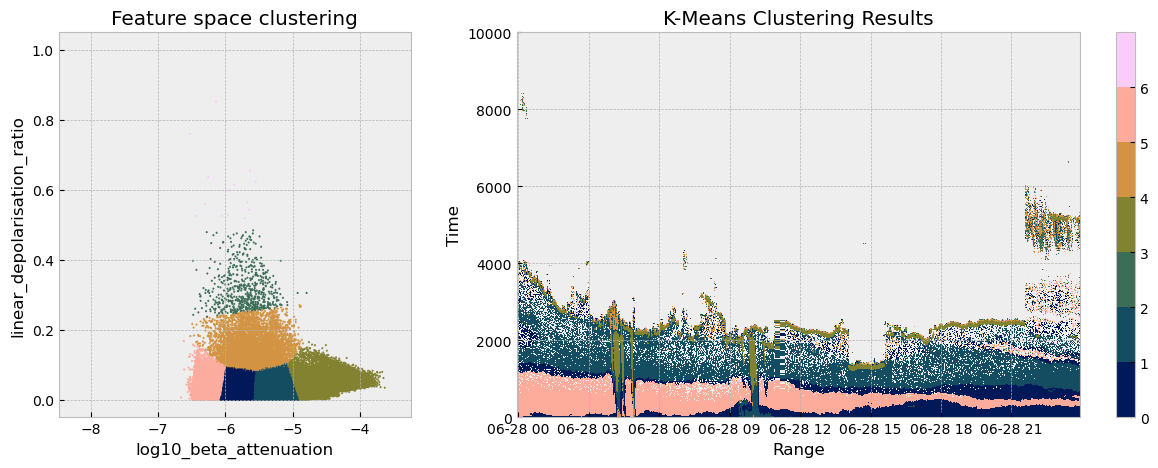

In [23]:
CL61_data_module.process.clustering.perform_K_means(cluster_N=7, weights=[1,1,0.2])

## Classify the results

### By k-mean clustering + thresholds

In [ ]:
CL61_data_module.classify_clusters()

In [ ]:
CL61_data_module.plot_classes_colormesh()

### By element wise ("Pixel-wise") classification + thresholds

In [ ]:
CL61_data_module.classify_elementwise()

In [ ]:
CL61_data_module.plot_classes_colormesh(variable_classified='classified_elements')